In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
plt.style.use('ggplot')

In [3]:
#Import CSV files
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

#Filter by delayed flights
outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]

In [4]:
#Filter to causes of delay and remove NaN
outbound_cause = outbound_delays[['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
outbound_cause = outbound_cause.dropna(axis=0, how='any').reset_index(drop=True)

inbound_cause = inbound_delays[['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
inbound_cause = inbound_cause.dropna(axis=0, how='any').reset_index(drop=True)

#Combine outbound and inbound delays
frames = [outbound_cause, inbound_cause]
all_cause = pd.concat(frames)
all_cause_year = all_cause[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]


#Delayed Minutes
outbound_delay_minutes = int(outbound_delays['ArrDelay'].sum())
inbound_delay_minutes = int(inbound_delays['ArrDelay'].sum())
total_delay_minutes = outbound_delay_minutes + inbound_delay_minutes

per_cause_delay_minutes = [round(x) for x in all_cause_year.sum().tolist()]

#Percentage delays per cause
percent_minutes_delay = [round((x/total_delay_minutes)*100, 2) for x in per_cause_delay_minutes]

percent_df = pd.DataFrame()
percent_df['Cause'] = ['Air Carrier','Extreme Weather','Natl. Aviation System','Security','Late-arriving Aircraft']
percent_df['Percent delay'] = percent_minutes_delay
percent_df = percent_df.sort_values('Percent delay', ascending=False).reset_index(drop=True)

In [5]:
#Boolean delay causes
all_cause_bool = pd.DataFrame()
for col in all_cause_year:
    all_cause_bool[col] = (all_cause_year[col] > 0).astype(int)

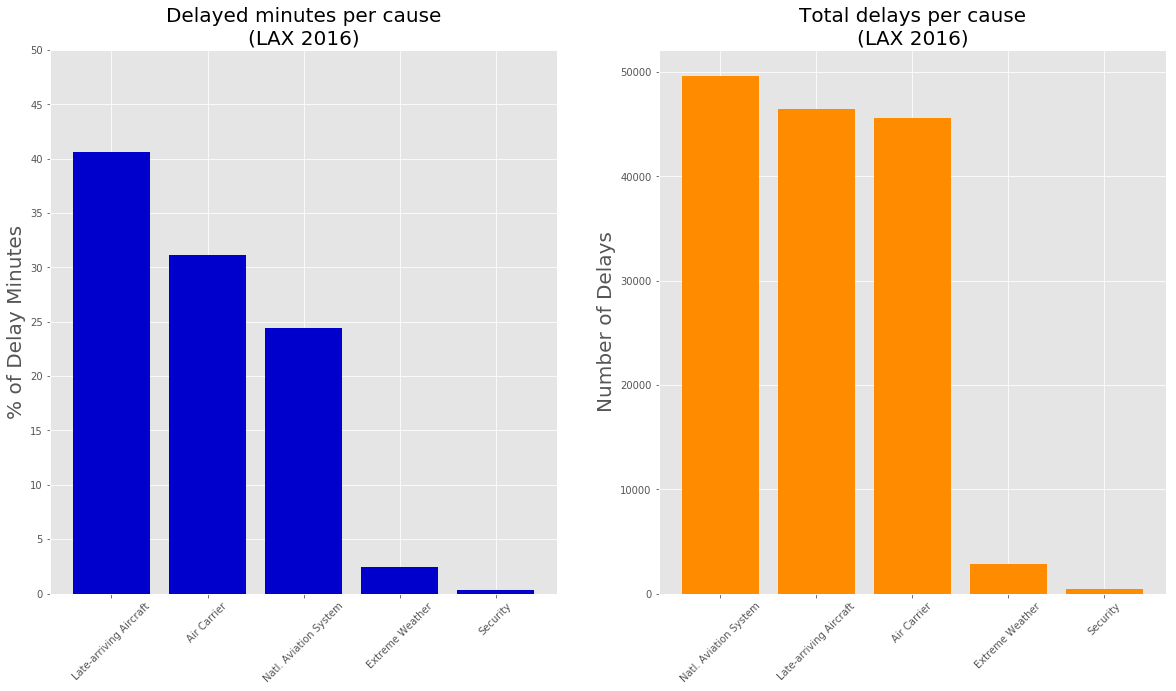

In [6]:
#Plot summary bar charts
x_axis = np.arange(1,6,1)
delay_counts = all_cause_bool.sum()
delay_counts_sort = delay_counts.sort_values(ascending=False).reset_index()
cause_name = ['Natl. Aviation System','Late-arriving Aircraft','Air Carrier','Extreme Weather','Security']

plt.figure(figsize=(20,10))
y_axis = np.arange(0,55,5)

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)

ax1.bar(x_axis, percent_df['Percent delay'], color='#0000CD')
ax1.set_title('Delayed minutes per cause\n(LAX 2016)', size=20)
ax1.set_xticks(x_axis)
ax1.set_xticklabels(percent_df['Cause'], rotation=45)
ax1.set_ylabel('% of Delay Minutes', size=20)
ax1.set_yticks(y_axis)
ax1.set_ylim(0,50)

ax2.bar(x_axis, delay_counts_sort[0], color='#FF8C00')
ax2.set_title('Total delays per cause\n(LAX 2016)', size=20)
ax2.set_xticks(x_axis)
ax2.set_xticklabels(cause_name, rotation=45)
ax2.set_ylabel('Number of Delays', size=20)

plt.savefig('images/yearly_delay_cause.png')
plt.show()



In [7]:
#Monthly cause of delay

monthly_delay_minutes = all_cause.groupby(['Month']).sum().astype(int)
monthly_delay_minutes['Total'] = monthly_delay_minutes.sum(axis=1)

monthly_percentage_df = pd.DataFrame()

for col in monthly_delay_minutes:
    monthly_percentage_df[col] = round((monthly_delay_minutes[col]/monthly_delay_minutes['Total'])*100, 2)

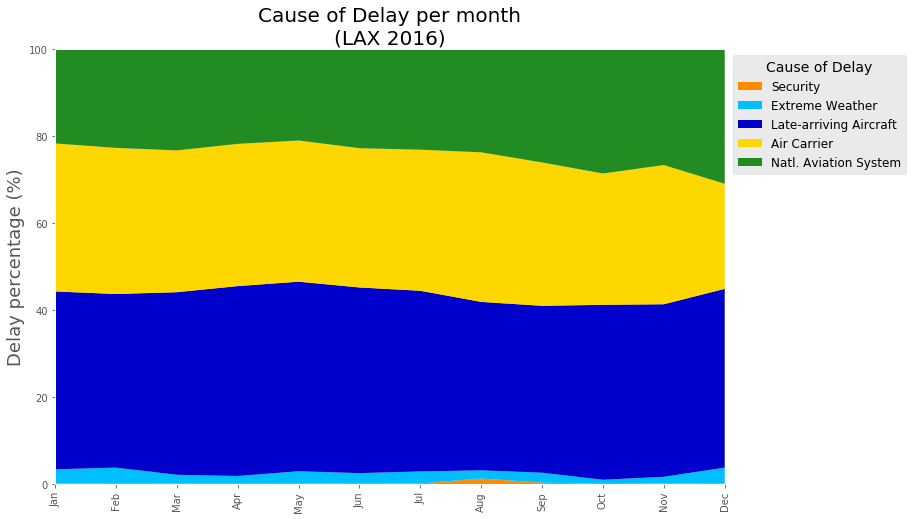

In [11]:
#Plot monthly cause of delay

months = calendar.month_abbr[1:13]
x_axis = np.arange(0, 12, 1)
cause = ['Security','Extreme Weather','Late-arriving Aircraft','Air Carrier','Natl. Aviation System']

plt.figure(figsize=(12,8))
plt.stackplot(x_axis,
              monthly_percentage_df['SecurityDelay'],
              monthly_percentage_df['WeatherDelay'],
              monthly_percentage_df['LateAircraftDelay'],
              monthly_percentage_df['CarrierDelay'],
              monthly_percentage_df['NASDelay'],
              colors=['#FF8C00','#00BFFF','#0000CD','#FFD700','#228B22'],
              labels=cause)
plt.xticks(x_axis, months, rotation='vertical')
plt.title('Cause of Delay per month\n(LAX 2016)', size=20)
plt.ylabel('Delay percentage (%)', size=18)

legend = plt.legend(bbox_to_anchor=(1.28,1), loc="upper right", fontsize=12)
legend.set_title('Cause of Delay', prop={'size':14})

plt.margins(0)
plt.savefig('images/monthly_delay_cause.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()